 # Problem Statement
 The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

## Objectives of Notebook 📌¶
👉 This notebook aims to:

- Build various ML models that can predict loan approval

The machine learning models used in this project are:

- Logistic Regression
- Decision Tree
- Random Forest


## Importing Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Reading Data Set

In [123]:
df=pd.read_csv('/content/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
df.shape

(614, 13)

In [125]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [126]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Data Preprocessing

In [127]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- You can observe from above results that the columns Applicant Income,Co Applicant Income has a postive Skewness as Mean is very much higher than that of median(50%)

In [128]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
cat_cols=[]
list1=list(df.columns)

for x in list1:
  if df[x].dtype=='O':
    cat_cols.append(x)

cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [130]:
cat_cols.pop()

'Loan_Status'

In [131]:
cat_cols.pop(0)

'Loan_ID'

In [132]:
for x in cat_cols:
  print('The value counts in column',x,'are:')
  print(df[x].value_counts(dropna=False))
  print('*'*100)

The value counts in column Gender are:
Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
****************************************************************************************************
The value counts in column Married are:
Yes    398
No     213
NaN      3
Name: Married, dtype: int64
****************************************************************************************************
The value counts in column Dependents are:
0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
****************************************************************************************************
The value counts in column Education are:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************************************************************************
The value counts in column Self_Employed are:
No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
*********************************

### Data Imputation

#### Categorical Columns

In [133]:
for x in cat_cols:
  mode=df[x].mode()[0]
  df[x].fillna(mode,inplace=True)

### Numerical Columns

In [135]:
miss_cols=df.columns[df.isnull().any()].tolist()

In [136]:
for x in miss_cols:
  print('The value counts in column',x,'are:')
  print(df[x].value_counts(dropna=False))
  print('*'*100)

The value counts in column LoanAmount are:
NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 204, dtype: int64
****************************************************************************************************
The value counts in column Loan_Amount_Term are:
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
****************************************************************************************************
The value counts in column Credit_History are:
1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64
****************************************************************************************************


- As Credit History,Loan Amount Term appears to be a Categorical column, filling the null vales with Mode
- As the LoanAmount column has a skewed Distribution and there are presence of outliers, appropriate method to fill null values is using Median

In [137]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

### Converting Categorical Columns to Numerical Columns

In [140]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Urban':1,'Rural':0,'Semiurban':2})

In [141]:
df['Dependents']=df['Dependents'].astype('category')
df['Dependents']=df['Dependents'].cat.codes
df['Dependents']=df['Dependents'].astype('float')

In [143]:
dep_var='Loan_Status'
df[dep_var].unique()

array(['Y', 'N'], dtype=object)

In [144]:
df[dep_var]=df[dep_var].map({'Y':1,'N':0})

### Dropping Unnecessary Variables

In [145]:
df.drop('Loan_ID',axis=1,inplace=True)

### Removing Outliers and Infinte Values

In [146]:
cols=list(df.columns)
print('shape with outliers:',df.shape)
for x in cols:
  mean=df[x].mean()
  stddev=np.std(df[x])
  upper=mean+3*stddev
  lower=mean-3*stddev
  outliers=df[(df[x]<lower)|(df[x]>upper)]
  if len(outliers)>0:
    df=df[(df[x]>=lower)&(df[x]<upper)]
  #else:
    #print("No outlier for column:",x)
  #print('----------------------------------------------------------------------------------')

print('shape without outliers:',df.shape)

shape with outliers: (614, 12)
shape without outliers: (575, 12)


### Removing Duplicates

In [147]:
print('shape with duplicates:',df.shape)
df.drop_duplicates()
print('shape without duplicates:',df.shape)

shape with duplicates: (575, 12)
shape without duplicates: (575, 12)


- We can observe that dataset does not have any duplicates

### Dropping Highly Correlated Features

<Axes: >

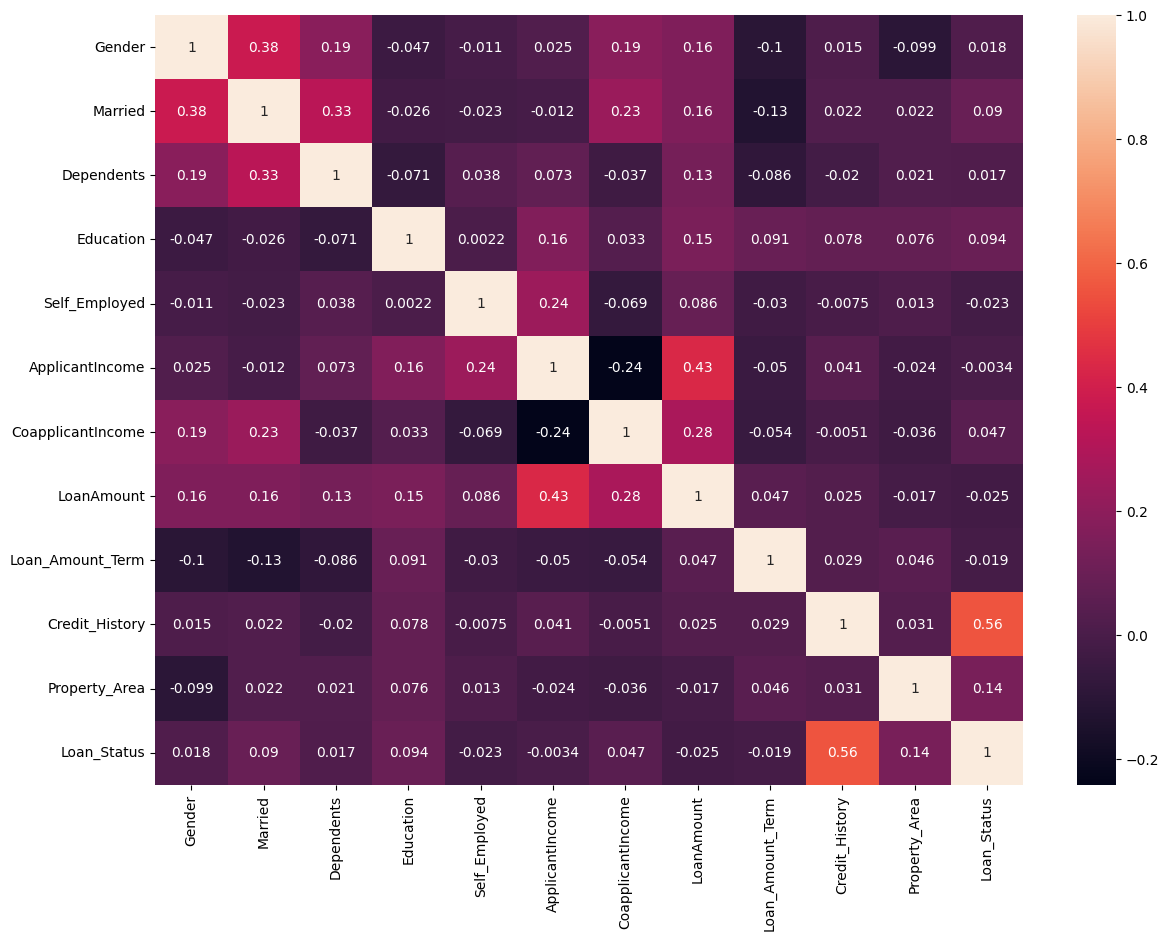

In [148]:
corr=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True,cbar=True)

In [149]:
# map features to their absolute correlation values
corr = df.drop(dep_var,axis=1).corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
x=(corr_cols[corr_cols > 0.7])
list2=list(x.index)
print(list2)

[]


- We can observe that no features have a higher degree of correlation

### Dropping features with low variance

In [150]:
new_df=pd.DataFrame(df.var())
list1=list(new_df[new_df[0]<=0.06].index)
list1

[]

- We can observe that no features have lower degree of variance

<Axes: xlabel='Loan_Status', ylabel='count'>

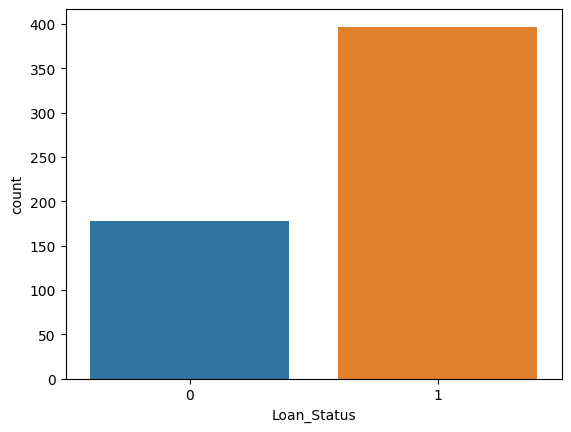

In [151]:
sns.countplot(x=dep_var,data=df)

- As the Dataset is imbalanced, we can rely on F1 Score instead of accuracy score

## Data Transformation

In [152]:
X=df.drop(dep_var,axis=1)
y=df[dep_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

## Models

### Logistic Regression

- Checking best parameters for max accuracy,F1 score using GridSearchCV

In [153]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


In [154]:
logit=LogisticRegression(C=10,penalty='l2')
logit.fit(X_train_sc,y_train)
pv_logit=logit.predict(X_test_sc)
print('Accuarcy score for logistic regression is:',accuracy_score(y_test,pv_logit))
print('f1 score for Logistic Regression:',f1_score(y_test,pv_logit))

Accuarcy score for logistic regression is: 0.8
f1 score for Logistic Regression: 0.8670520231213872


### Decision Tree Classifier

- Checking best parameters for max accuracy,F1 score using GridSearchCV

In [155]:
param_grid = {'max_depth': [None,5, 10, 20, 30],  }
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 5}


In [156]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
pv_dt=logit.predict(X_test)
print('Accuarcy score is:',accuracy_score(y_test,pv_dt))
print('f1 score for model:',f1_score(y_test,pv_dt))

Accuarcy score for logistic regression is: 0.6608695652173913
f1 score for model: 0.7958115183246073


#### Decision Tree using Feature importances

In [157]:
columns=list(X_train.columns)
features=list(dt.feature_importances_)
f_data=pd.DataFrame({'Feature':columns,'Importance':features})
f_data=f_data.sort_values(by='Importance',ascending=False)
f_data.Importance=f_data.Importance*100
f_data

,Feature,Importance
9,Credit_History,66.285812
7,LoanAmount,12.894385
5,ApplicantIncome,9.509856
6,CoapplicantIncome,4.970805
10,Property_Area,3.058161
8,Loan_Amount_Term,1.648726
1,Married,1.632255
0,Gender,0.000000
2,Dependents,0.000000
3,Education,0.000000


<Axes: xlabel='Importance', ylabel='Feature'>

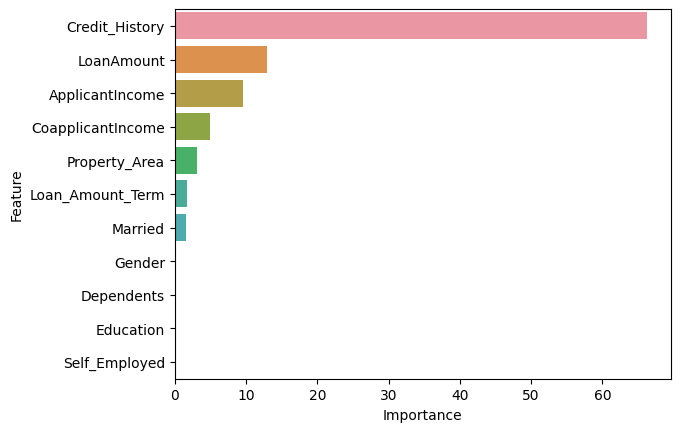

In [158]:
sns.barplot(f_data,x='Importance',y='Feature')

In [159]:
features=f_data[f_data['Importance']>3]['Feature'].tolist()

In [160]:
X_train_new=X_train[features]
X_test_new=X_test[features]

In [161]:
dt_new=DecisionTreeClassifier(max_depth=5)
dt_new.fit(X_train_new,y_train)
pv_dt_new=dt_new.predict(X_test_new)
print('Accuracy of the model is:',accuracy_score(y_test,pv_dt_new))
print('f1 score for model:',f1_score(y_test,pv_dt_new))

Accuracy of the model is: 0.782608695652174
f1 score for model: 0.8554913294797687


<function matplotlib.pyplot.show(close=None, block=None)>

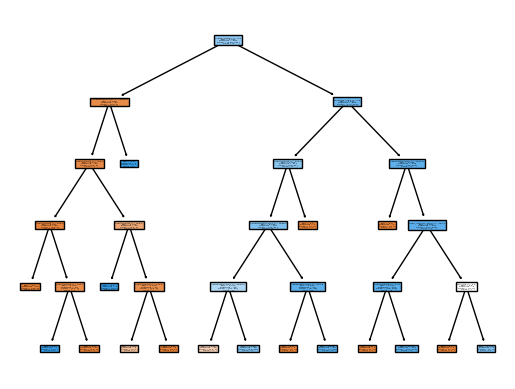

In [162]:
feature=df.columns
classes=['Y','N']
from sklearn import tree
tree.plot_tree(dt,feature_names=feature,class_names=classes,filled=True)
plt.show

### Random Forest

- Checking best parameters for max accuracy,F1 score using GridSearchCV

In [163]:
param_grid = {'n_estimators': [10, 50, 100,150], 'max_depth': [None, 5,10, 20, 30]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 100}


In [164]:
rf=RandomForestClassifier(n_estimators=100,max_depth=5)
rf.fit(X_train,y_train)
pv_rf=rf.predict(X_test)
print('Accuracy of the model is:',accuracy_score(y_test,pv_rf))
print('f1 score for model:',f1_score(y_test,pv_rf))

Accuracy of the model is: 0.808695652173913
f1 score for model: 0.8720930232558138


#### Random Forest Using Feature Importances

In [165]:
importance=list(rf.feature_importances_)
feat=list(X_train.columns)
df_feat=pd.DataFrame({'Features':feat,'Importance':importance}).sort_values(by='Importance',ascending=False)
df_feat['Importance']=df_feat['Importance']*100
df_feat

,Features,Importance
9,Credit_History,54.623286
5,ApplicantIncome,10.661819
7,LoanAmount,9.443552
6,CoapplicantIncome,6.645058
10,Property_Area,5.304667
8,Loan_Amount_Term,4.134741
3,Education,2.942308
2,Dependents,2.452483
1,Married,2.225171
4,Self_Employed,0.857378


<Axes: xlabel='Importance', ylabel='Features'>

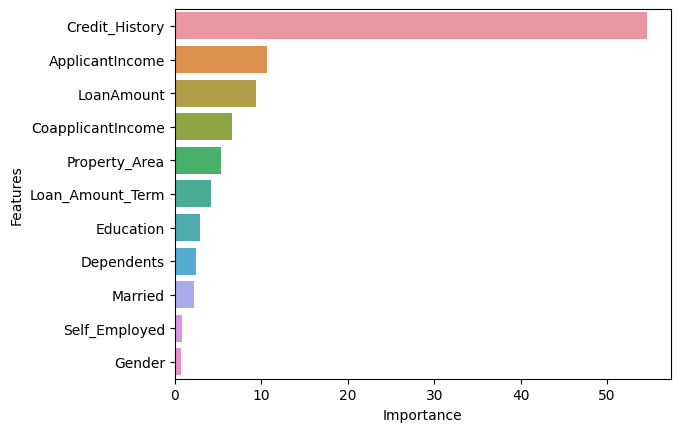

In [166]:
sns.barplot(df_feat,x='Importance',y='Features')

In [167]:
features=f_data[f_data['Importance']>4]['Feature'].tolist()

In [168]:
X_train_new=X_train[features]
X_test_new=X_test[features]

In [169]:
rf_new=RandomForestClassifier(n_estimators=100,max_depth=5)
rf_new.fit(X_train_new,y_train)
pv_rf_new=rf_new.predict(X_test_new)
print('Accuracy of the model is:',accuracy_score(y_test,pv_rf_new))
print('f1 score for model:',f1_score(y_test,pv_rf_new))

Accuracy of the model is: 0.8
f1 score for model: 0.8670520231213872


# Model Comparison

In [171]:
print('*'*100)
print('The results from Logistic Regression are:')
print('Accuarcy score is:',accuracy_score(y_test,pv_logit))
print('f1 score is:',f1_score(y_test,pv_logit))
print('*'*100)
print('The results from Decision Tree Classifier are:')
print('Accuarcy score is:',accuracy_score(y_test,pv_dt))
print('f1 score is:',f1_score(y_test,pv_dt))
print('*'*100)
print('The results from Decision Tree Classifier after feature importances are:')
print('Accuracy score is:',accuracy_score(y_test,pv_dt_new))
print('f1 score is:',f1_score(y_test,pv_dt_new))
print('*'*100)
print('The results from Random Forest Classifier are:')
print('Accuracy score is:',accuracy_score(y_test,pv_rf))
print('f1 score is:',f1_score(y_test,pv_rf))
print('*'*100)
print('The results from Random Forest Classifier after feature importances are:')
print('Accuracy score is:',accuracy_score(y_test,pv_rf_new))
print('f1 score is:',f1_score(y_test,pv_rf_new))
print('*'*100)

****************************************************************************************************
The results from Logistic Regression are:
Accuarcy score is: 0.8
f1 score is: 0.8670520231213872
****************************************************************************************************
The results from Decision Tree Classifier are:
Accuarcy score is: 0.6608695652173913
f1 score is: 0.7958115183246073
****************************************************************************************************
The results from Decision Tree Classifier after feature importances are:
Accuracy score is: 0.782608695652174
f1 score is: 0.8554913294797687
****************************************************************************************************
The results from Random Forest Classifier are:
Accuracy score is: 0.808695652173913
f1 score is: 0.8720930232558138
****************************************************************************************************
The results from Random

- In general, it can be seen that all models can achieve up to 75% accuracy and F1 score of 0.8
- The highest accuracy is 80% and Highest F1 score is 0.87